<a href="https://colab.research.google.com/github/Anusha1527/covid-19-analysis/blob/main/covid-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import required libraries
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
#Load the CSV file
df = pd.read_csv("covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1D4jrYrdR57zXSHwfPzfaojqQ7NMfFTLC_uuRdmxntr4/edit#gid=0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1rsC5irOEk5S-aIy-yAHbZxJB5haQvVirShbmSJRsm8Q/edit#gid=0


In [ ]:
#Check columns
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
#Convert Date column
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
#Create date-wise aggregated data
date_wise = df.groupby("Date")[["Confirmed", "Recovered", "Deaths"]].sum().reset_index()
date_wise.head()

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,555,28,17
1,2020-01-23,654,30,18
2,2020-01-24,941,36,26
3,2020-01-25,1434,39,42
4,2020-01-26,2118,52,56


In [ ]:
#Visualizing infection trend
fig = px.line(
    date_wise,
    x="Date",
    y="Confirmed",
    title="COVID-19 Infection Trend (Confirmed Cases)"
)
fig.show()

In [ ]:
# Visualizing the recovery trend
fig = px.line(
    date_wise,
    x="Date",
    y="Recovered",
    title="COVID-19 Recovery Trend"
)
fig.show()

In [ ]:
#Prepare data for prediction
prophet_df = date_wise[["Date", "Confirmed"]]
prophet_df.columns = ["ds", "y"]

In [ ]:
#Train Prophet model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Predict next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

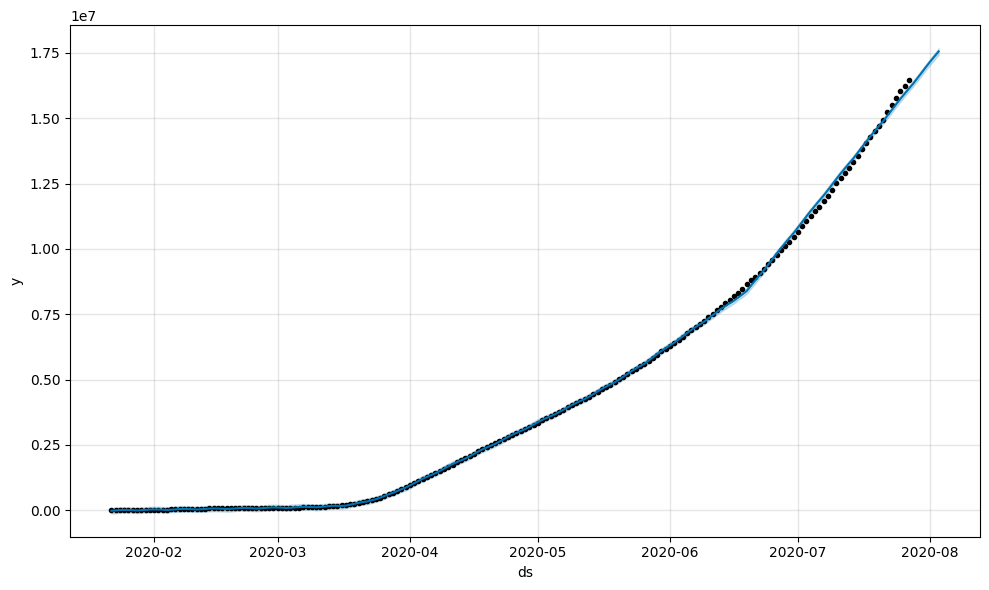

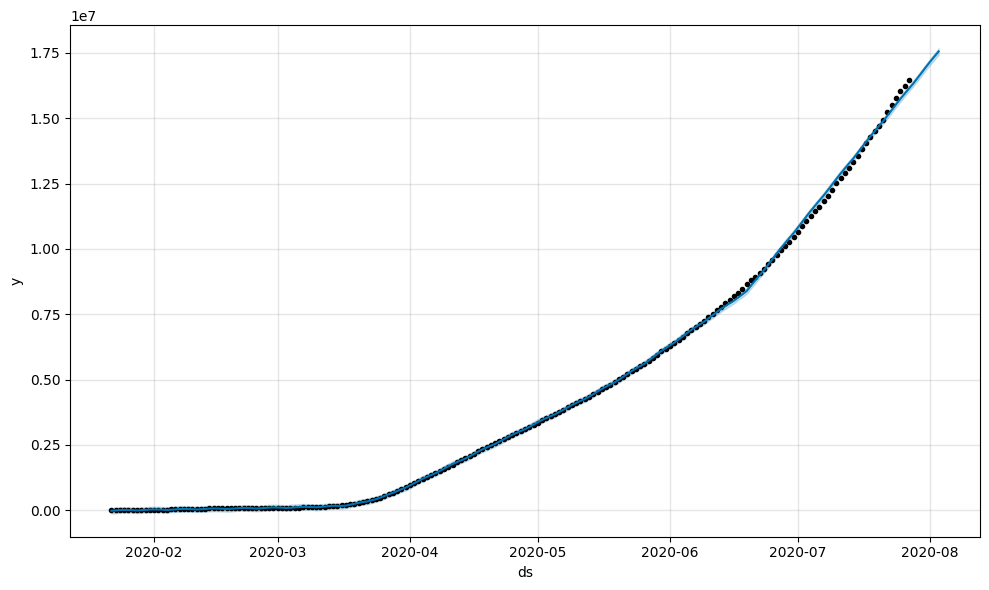

In [ ]:
#Visualizing the prediction
model.plot(forecast)